# Naive Bayes for text classification

## Setup

### Read data

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
# ! pip install requests
import requests 
import zipfile
import pandas as pd
import os

# Define the data folder and file path
data_file = 'muskGates.tsv'


# Read Dataset
data = pd.read_table(data_file, 
                     header = 0,
                     names = ['type', 'message']
                     )

# Show dataset
data

,type,message
0,BillGates,My favorite magazine makes a good case for inv...
1,BillGates,Health is getting better around the world—but ...
2,BillGates,Federal funding plays a critical role in R&amp...
3,BillGates,@jeremys Glad to see those intern BBQs made a ...
4,BillGates,The Global Water Crisis is Also a Sanitation C...
...,...,...
4759,elonmusk,@Nezheim @jbmeicher sure :)
4760,elonmusk,"@UKPJD Similar to SpaceX, the T is like a cros..."
4761,elonmusk,@HBL_Cosmin Wait until you see the real steeri...
4762,elonmusk,We are definitely patenting this idea https://...


#### Install the language toolkit

In [37]:
# NLTK: Natural Language Toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /Users/nerea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nerea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Tokenization:**

In [38]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['message']), axis = 1)
data

,type,message,tokens
0,BillGates,My favorite magazine makes a good case for inv...,"[My, favorite, magazine, makes, a, good, case,..."
1,BillGates,Health is getting better around the world—but ...,"[Health, is, getting, better, around, the, wor..."
2,BillGates,Federal funding plays a critical role in R&amp...,"[Federal, funding, plays, a, critical, role, i..."
3,BillGates,@jeremys Glad to see those intern BBQs made a ...,"[jeremys, Glad, to, see, those, intern, BBQs, ..."
4,BillGates,The Global Water Crisis is Also a Sanitation C...,"[The, Global, Water, Crisis, is, Also, a, Sani..."
...,...,...,...
4759,elonmusk,@Nezheim @jbmeicher sure :),"[Nezheim, jbmeicher, sure]"
4760,elonmusk,"@UKPJD Similar to SpaceX, the T is like a cros...","[UKPJD, Similar, to, SpaceX, the, T, is, like,..."
4761,elonmusk,@HBL_Cosmin Wait until you see the real steeri...,"[HBL_Cosmin, Wait, until, you, see, the, real,..."
4762,elonmusk,We are definitely patenting this idea https://...,"[We, are, definitely, patenting, this, idea, h..."


### **Elimination of stop words**:

In [39]:
# These are the stop words provided by Sklearn
from sklearn.feature_extraction import text
print(text.ENGLISH_STOP_WORDS)

frozenset({'its', 'yourself', 'ie', 'such', 'front', 'may', 'has', 'she', 'sometime', 'six', 'anyway', 'latter', 'sincere', 'meanwhile', 'something', 'you', 'against', 'so', 'same', 'move', 'eleven', 'within', 'or', 'whether', 'mostly', 'well', 'became', 'done', 'throughout', 'further', 'mine', 'cant', 'cry', 'of', 'sometimes', 'only', 'seemed', 'system', 'alone', 'whole', 'third', 'fifteen', 'was', 'part', 'everywhere', 'become', 'often', 'onto', 'whereby', 'few', 'these', 'what', 'among', 'towards', 'hereby', 'hereupon', 'but', 'con', 'couldnt', 'an', 'beforehand', 'thereby', 'whenever', 'therefore', 'were', 'nobody', 'un', 'de', 'can', 'via', 'nor', 'fifty', 'see', 'is', 'whither', 'herein', 'somewhere', 'him', 'due', 'thin', 'am', 'all', 'whereafter', 'everything', 'seem', 'out', 'herself', 'describe', 'thereupon', 'could', 'even', 'our', 'beyond', 'elsewhere', 'namely', 'never', 'by', 'less', 'find', 'two', 'a', 'though', 'will', 'during', 'very', 'however', 'how', 'found', 'get',

In [40]:
# These are the stop words provided by nltk, the library we will be using in this example
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# Remove stop words
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in stop])
data

,type,message,tokens
0,BillGates,My favorite magazine makes a good case for inv...,"[My, favorite, magazine, makes, good, case, in..."
1,BillGates,Health is getting better around the world—but ...,"[Health, getting, better, around, world, progr..."
2,BillGates,Federal funding plays a critical role in R&amp...,"[Federal, funding, plays, critical, role, R, a..."
3,BillGates,@jeremys Glad to see those intern BBQs made a ...,"[jeremys, Glad, see, intern, BBQs, made, lasti..."
4,BillGates,The Global Water Crisis is Also a Sanitation C...,"[The, Global, Water, Crisis, Also, Sanitation,..."
...,...,...,...
4759,elonmusk,@Nezheim @jbmeicher sure :),"[Nezheim, jbmeicher, sure]"
4760,elonmusk,"@UKPJD Similar to SpaceX, the T is like a cros...","[UKPJD, Similar, SpaceX, T, like, cross, secti..."
4761,elonmusk,@HBL_Cosmin Wait until you see the real steeri...,"[HBL_Cosmin, Wait, see, real, steering, contro..."
4762,elonmusk,We are definitely patenting this idea https://...,"[We, definitely, patenting, idea, https, co, N..."


**3rd step: Apply stemming.** The two words that mean the same thing, but are not spelled the same

**Stemming**: Stemming is a process of reducing inflected words to their word stem, base or root form. This is done by removing affixes, which are word parts that are added to the root to change its meaning or grammatical function. For example, the word "running" can be stemmed to "run" by removing the suffix "-ing".

**Lemmatization**: It is more used in NLP projects in English, since in this language good (good), better (better) and the best (best) are completely different words. In these cases stemming would not work. Thus, the lemmatization would convert all those words to their base (good), in such a way that they come to mean the same thing. 

The nltk does not perform the conversion automatically unless it is given additional information about the type of word (adjective, noun, verb, etc). If you do not specify the grammatical category, the lemmatiser assumes that the words are nouns, and for nouns there is no direct association, for instance, between "better" and "good". This makes more complex the whole process, so we would not implement lemmatization in this example

In [42]:
# Apply Porter stemming
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
data

,type,message,tokens
0,BillGates,My favorite magazine makes a good case for inv...,"[my, favorit, magazin, make, good, case, inves..."
1,BillGates,Health is getting better around the world—but ...,"[health, get, better, around, world, progress,..."
2,BillGates,Federal funding plays a critical role in R&amp...,"[feder, fund, play, critic, role, r, amp, d, i..."
3,BillGates,@jeremys Glad to see those intern BBQs made a ...,"[jeremi, glad, see, intern, bbq, made, last, i..."
4,BillGates,The Global Water Crisis is Also a Sanitation C...,"[the, global, water, crisi, also, sanit, crisi..."
...,...,...,...
4759,elonmusk,@Nezheim @jbmeicher sure :),"[nezheim, jbmeicher, sure]"
4760,elonmusk,"@UKPJD Similar to SpaceX, the T is like a cros...","[ukpjd, similar, spacex, t, like, cross, secti..."
4761,elonmusk,@HBL_Cosmin Wait until you see the real steeri...,"[hbl_cosmin, wait, see, real, steer, control, ..."
4762,elonmusk,We are definitely patenting this idea https://...,"[we, definit, patent, idea, http, co, n46cvn9ux9]"


In [43]:
# Install openpyxl
# %pip install openpyxl

# we can export it to excel
data.to_excel("data.xlsx")

## Naive Bayes Model

### Naive Bayes model input

First, we are detokenizing the rows, that is, joining back the words, once they have been cleaned

In [44]:
# Unify the strings once again
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,type,message,tokens
0,BillGates,My favorite magazine makes a good case for inv...,my favorit magazin make good case invest resea...
1,BillGates,Health is getting better around the world—but ...,health get better around world progress uneven...
2,BillGates,Federal funding plays a critical role in R&amp...,feder fund play critic role r amp d it would m...
3,BillGates,@jeremys Glad to see those intern BBQs made a ...,jeremi glad see intern bbq made last impress i...
4,BillGates,The Global Water Crisis is Also a Sanitation C...,the global water crisi also sanit crisi http c...
...,...,...,...
4759,elonmusk,@Nezheim @jbmeicher sure :),nezheim jbmeicher sure
4760,elonmusk,"@UKPJD Similar to SpaceX, the T is like a cros...",ukpjd similar spacex t like cross section elec...
4761,elonmusk,@HBL_Cosmin Wait until you see the real steeri...,hbl_cosmin wait see real steer control system ...
4762,elonmusk,We are definitely patenting this idea https://...,we definit patent idea http co n46cvn9ux9


Now we are splitting our data as always

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['type'], 
    test_size= 0.3
    )

print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  3334
Testing data set size:  1430


We create the matrix, it will be the input to our model

In [50]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

In [51]:
x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13752 stored elements and shape (1430, 8557)>

### Model Built and Training

Now we build the Naive Bayes model and train it

In [52]:
# Build the model
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

And we make predictions

In [53]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

This is the result

In [ ]:
# Results
results = pd.DataFrame({
    'Data Set': ['Train', 'Test'],
    'Balanced Accuracy': [train_scores, test_scores]
})
print(results)

  Data Set  Balanced Accuracy
0    Train           0.979804
1     Test           0.952346


In [61]:
from sklearn.metrics import recall_score

# Recall
recall_billgates = recall_score(y_test, test_predict, pos_label='BillGates')
recall_elonmusk = recall_score(y_test, test_predict, pos_label='elonmusk')

print(f"Recall for BillGates: {recall_billgates}")
print(f"Recall for elonmusk: {recall_elonmusk}")

Recall for BillGates: 0.992503748125937
Recall for elonmusk: 0.9121887287024901


And the confusion matrix

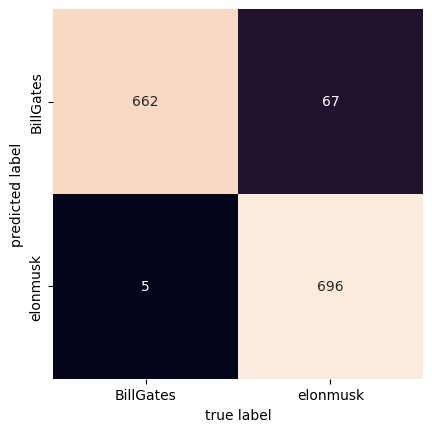

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Results and Conclusions

The Naive Bayes model has been trained and tested on the dataset. The balanced accuracy scores for the training and testing datasets are as follows:
- Training Balanced Accuracy: 0.98
- Testing Balanced Accuracy: 0.95

The high balanced accuracy scores for both training and testing datasets indicate that the model performs well in distinguishing between the two classes (BillGates and elonmusk).

The confusion matrix provides further insights into the model's performance:
- True Positives (BillGates correctly classified): 662
- True Negatives (elonmusk correctly classified): 696
- False Positives (elonmusk incorrectly classified as BillGates): 67
- False Negatives (BillGates incorrectly classified as elonmusk): 5

Overall, the model demonstrates good performance with high accuracy and low misclassification rates.

The recall for each class is the following:

- Recall for BillGates: 0.9925

- Recall for elonmusk: 0.9122

The high recall for BillGates indicates that the model is very effective at identifying tweets from BillGates, with very few false negatives. The recall for elonmusk is slightly lower, indicating that there are more false positives for this class, but it is still relatively high.
